In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy_outlier_detection.linear_regression import LinearRegressionNumpy
from numpy_outlier_detection.data import load_data, plot_data, plot_data_with_outliers_and_regression_line


In [3]:
def distance_from_line(x, y, coef, intercept):
    return abs(y - (coef*x + intercept))/np.sqrt(coef**2 + 1)

def z_score(data):
    return (data - data.mean())/data.std()

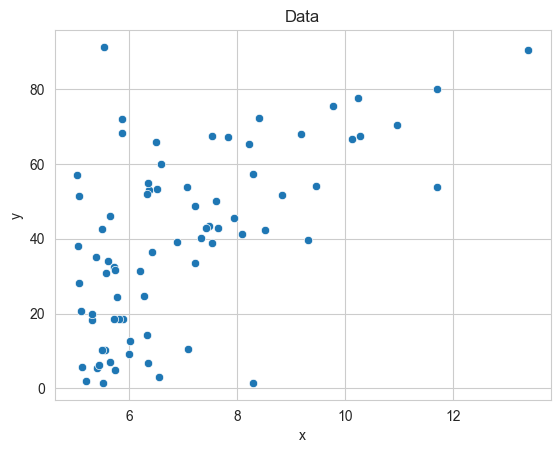

In [4]:
x, y = load_data()
plot_data(x, y)

# SKLEARN Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [7]:
model = LinearRegression()

In [8]:
reg = model.fit(x,y)

In [9]:
coef = reg.coef_
intercept = reg.intercept_
print('coef: ', coef)
print('intercept: ', intercept)

coef:  [[7.74349475]]
intercept:  [-14.33754595]


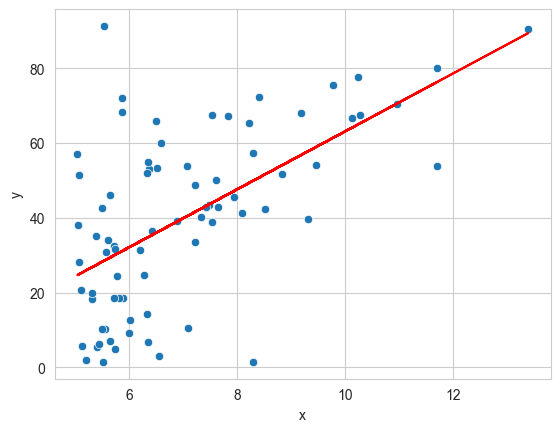

In [10]:
df = pd.DataFrame({'x': x[:, 0], 'y': y[:, 0]})
sns.scatterplot(x='x', y='y', data=df)
line = coef*x + intercept
plt.plot(x, line, color='red')

In [11]:
distances = distance_from_line(x, y, coef, intercept)
z_scores = z_score(distances)
outlier_indices = np.where(z_scores>1.5)[0]
outliers = df.iloc[outlier_indices]
outliers

,x,y
0,5.5277,91.3020
1,5.8598,68.2330
54,6.5479,2.9678
71,5.8707,72.0290
73,8.2934,1.4454


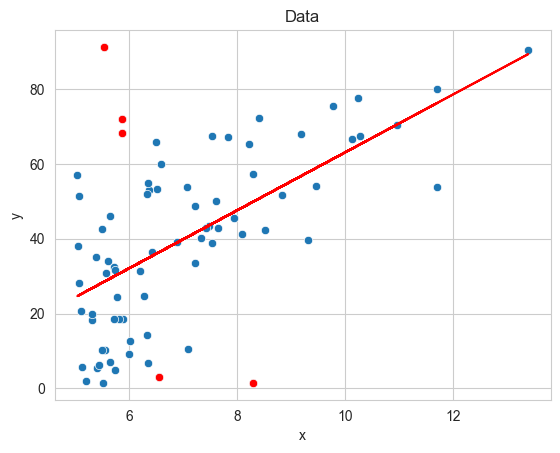

In [13]:
plot_data_with_outliers_and_regression_line(x, y, outliers, coef, intercept)

# Numpy Linear Regression

In [14]:
model = LinearRegressionNumpy()
model.fit(x, y)
coef = model.coef
intercept = model.intercept

In [15]:
print('coef: ', coef)
print('intercept: ', intercept)

coef:  [7.74349475]
intercept:  [-14.33754595]


In [16]:
df = pd.DataFrame({'x': x[:, 0], 'y': y[:, 0]})
distances = distance_from_line(x, y, coef, intercept)
z_scores = z_score(distances)
outlier_indices = np.where(z_scores > 1.5)[0]
outliers = df.iloc[outlier_indices]

In [17]:
distances = distance_from_line(x, y, coef, intercept)
z_scores = z_score(distances)
outlier_indices = np.where(z_scores>1.5)[0]
outliers = df.iloc[outlier_indices]
outliers

,x,y
0,5.5277,91.3020
1,5.8598,68.2330
54,6.5479,2.9678
71,5.8707,72.0290
73,8.2934,1.4454


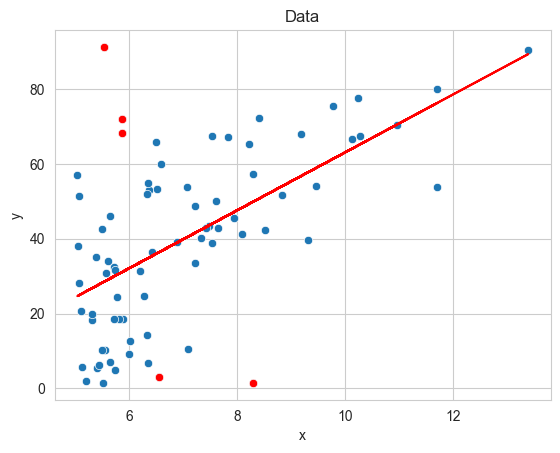

In [17]:
plot_data_with_outliers_and_regression_line(x, y, outliers, coef, intercept)